In [1]:
# Title:  Decision Trees

# INSTALL AND LOAD PACKAGES ################################

# Install pacman if you don't have it (uncomment next line)
# install.packages("pacman")

# Install and/or load packages with pacman
pacman::p_load(  # Use p_load function from pacman
  caret,         # Train/test functions
  e1071,         # Machine learning functions
  magrittr,      # Pipes
  pacman,        # Load/unload packages
  rattle,        # Pretty plot for decision trees
  rio,           # Import/export data
  tidyverse      # So many reasons
)

also installing the dependencies ‘bitops’, ‘rpart.plot’





The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//RtmpedILya/downloaded_packages



rattle installed



In [2]:
# Set random seed to reproduce the results
set.seed(1)

In [3]:
# LOAD AND PREPARE DATA ####################################

# Use the `spambase` datasets that were created previously 
# in "Spambase.R."

# Import training data `trn`
trn <- import("../data/spambase_trn.rds")

# Import testing data `tst`
tst <- import("../data/spambase_tst.rds")

In [4]:
# MODEL TRAINING DATA ######################################

# set training control parameters
ctrlparam <- trainControl(
  method  = "repeatedcv",   # method
  number  = 5,              # 5 fold
  repeats = 3               # 3 repeats
)

In [5]:
# Train decision tree on training data (takes a moment).
# First method tunes the complexity parameter.
dt1 <- train(
  y ~ .,                  # Use all vars to predict spam
  data = trn,             # Use training data
  method = "rpart",       # Tune the complexity parameter
  trControl = ctrlparam,  # Control parameters
  tuneLength = 10         # Try ten parameters
)

In [6]:
# Show processing summary
dt1

CART 

3220 samples
  57 predictor
   2 classes: 'NotSpam', 'Spam' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 2576, 2576, 2576, 2576, 2576, 2576, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.007751938  0.8944099  0.7767421
  0.008527132  0.8935818  0.7748470
  0.009302326  0.8908903  0.7688916
  0.010077519  0.8891304  0.7651835
  0.014728682  0.8865424  0.7593925
  0.023255814  0.8783644  0.7419315
  0.033333333  0.8709110  0.7274344
  0.063565891  0.8535197  0.6904401
  0.070542636  0.8316770  0.6439864
  0.475193798  0.7028986  0.3022428

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.007751938.

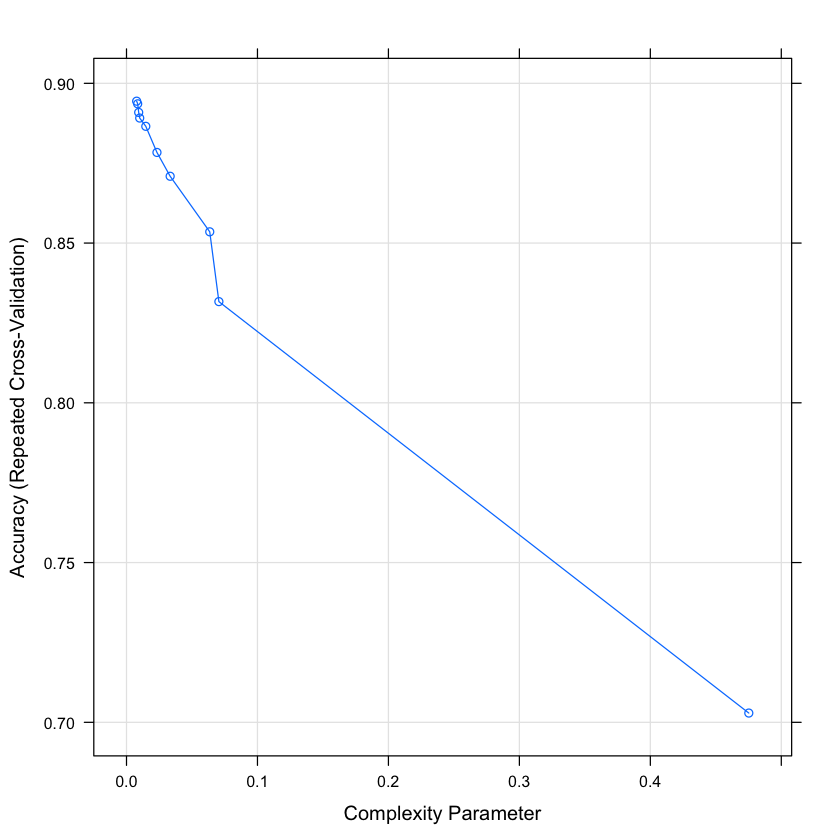

In [8]:
# Plot accuracy by complexity parameter values
dt1 %>% plot()

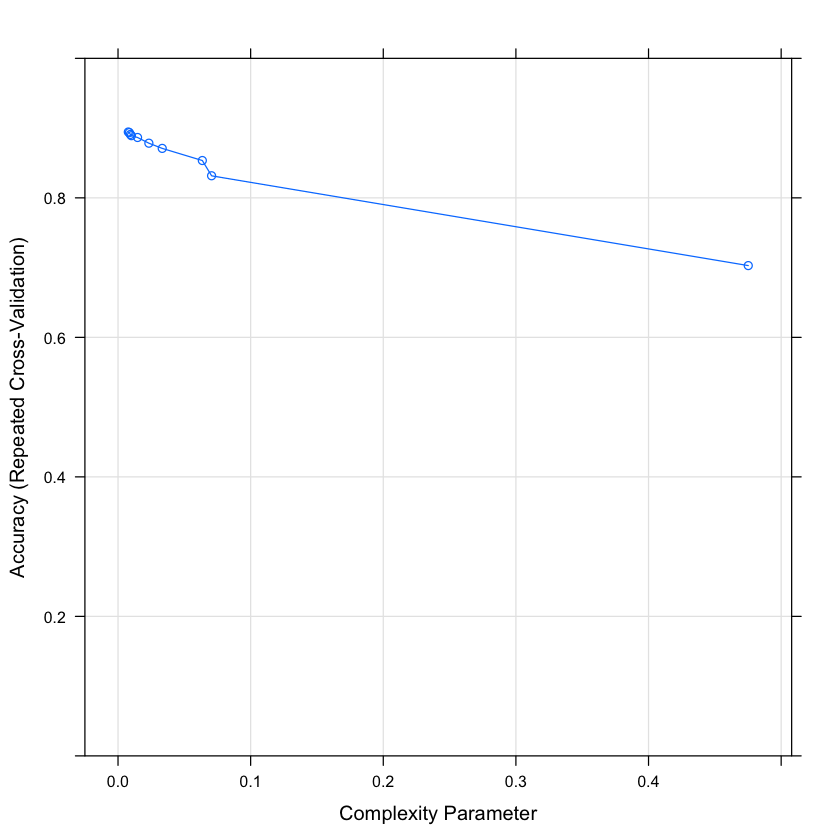

In [9]:
dt1 %>% plot(ylim = c(0, 1))  # Plot with 0-100% range

In [10]:
# Second method tunes the maximum tree depth
dt2 <- train(
  y ~ .,                  # Use all vars to predict spam
  data = trn,             # Use training data
  method = "rpart2",      # Tune the maximum tree depth
  trControl = ctrlparam,  # Control parameters
  tuneLength = 10         # Try ten parameters
)

In [11]:
# Show processing summary
dt2

CART 

3220 samples
  57 predictor
   2 classes: 'NotSpam', 'Spam' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 2576, 2576, 2576, 2576, 2576, 2576, ... 
Resampling results across tuning parameters:

  maxdepth  Accuracy   Kappa    
   1        0.7784679  0.5232084
   2        0.8267081  0.6342777
   4        0.8721532  0.7287193
   5        0.8810559  0.7470950
   6        0.8872671  0.7614272
   7        0.8908903  0.7695937
   8        0.8922360  0.7723816
   9        0.8932712  0.7745801
  10        0.8934783  0.7750478
  12        0.8933747  0.7748749

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was maxdepth = 10.

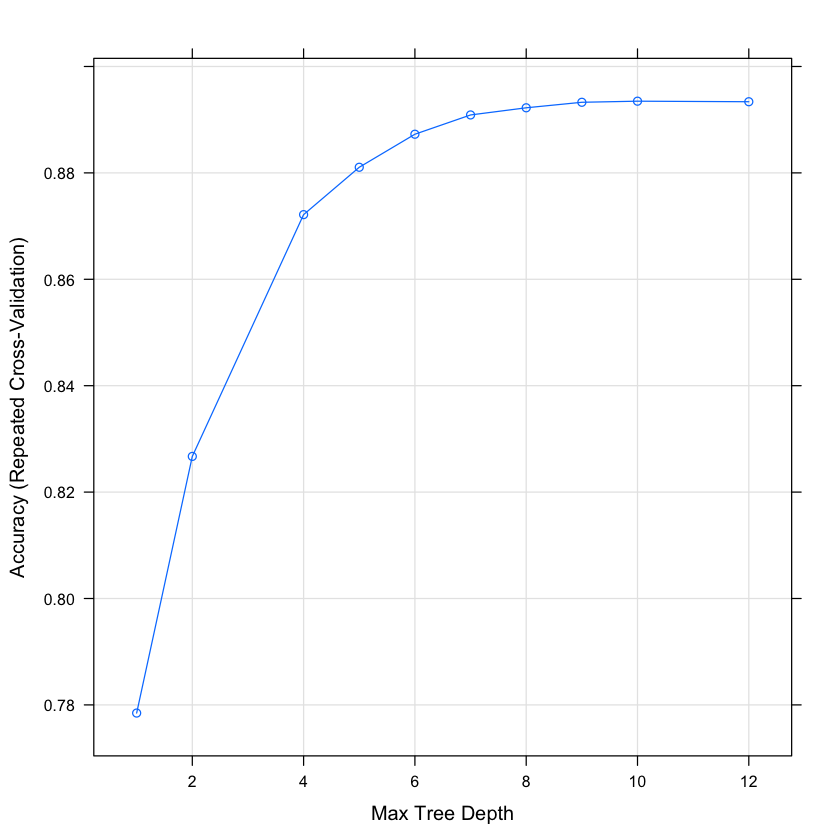

In [12]:
# Plot the accuracy for different parameter values
dt2 %>% plot()

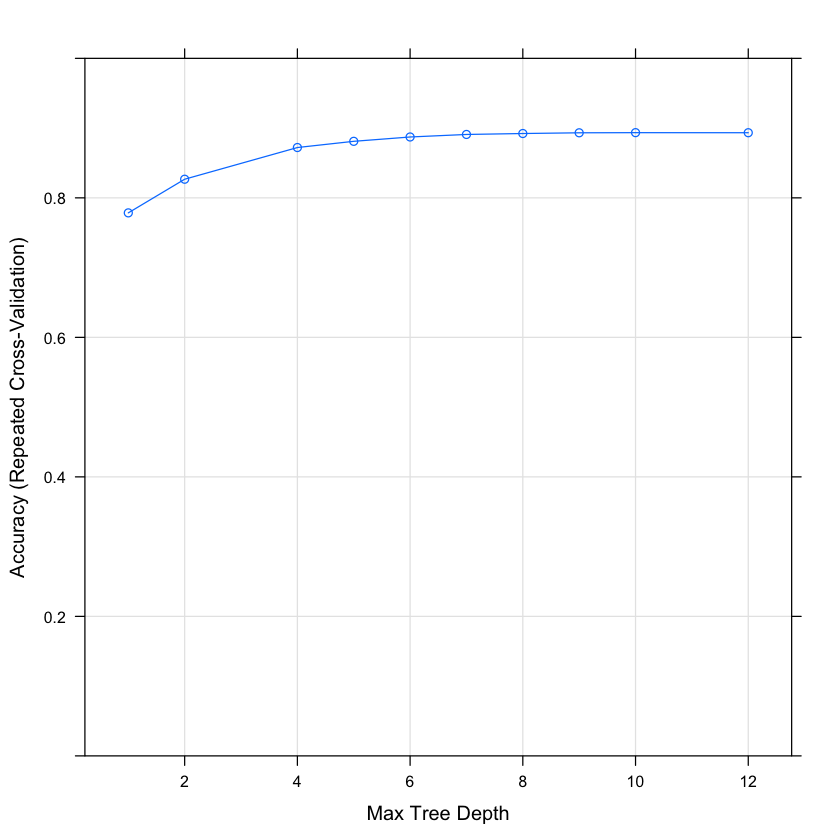

In [13]:
dt2 %>% plot(ylim = c(0, 1))  # Plot with 0-100% range

In [14]:
# Select the final model depending upon final accuracy
finaldt <- if (max(dt1$results$Accuracy) > 
  max(dt2$results$Accuracy)) {
  dt1
  } else {
  dt2
  }

In [15]:
# Description of final training model
finaldt$finalModel

n= 3220 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 3220 1290 NotSpam (0.59937888 0.40062112)  
   2) A52< 0.0795 1863  305 NotSpam (0.83628556 0.16371444)  
     4) A7< 0.045 1730  193 NotSpam (0.88843931 0.11156069)  
       8) A53< 0.164 1670  148 NotSpam (0.91137725 0.08862275) *
       9) A53>=0.164 60   15 Spam (0.25000000 0.75000000) *
     5) A7>=0.045 133   21 Spam (0.15789474 0.84210526)  
      10) A27>=0.11 12    0 NotSpam (1.00000000 0.00000000) *
      11) A27< 0.11 121    9 Spam (0.07438017 0.92561983) *
   3) A52>=0.0795 1357  372 Spam (0.27413412 0.72586588)  
     6) A55< 2.7545 572  263 NotSpam (0.54020979 0.45979021)  
      12) A16< 0.075 390  113 NotSpam (0.71025641 0.28974359)  
        24) A7< 0.045 343   68 NotSpam (0.80174927 0.19825073)  
          48) A8< 0.52 322   48 NotSpam (0.85093168 0.14906832)  
            96) A17< 0.295 301   32 NotSpam (0.89368771 0.10631229) *
            97) A17>=0.295 21    5 Spam (0.23809524 0

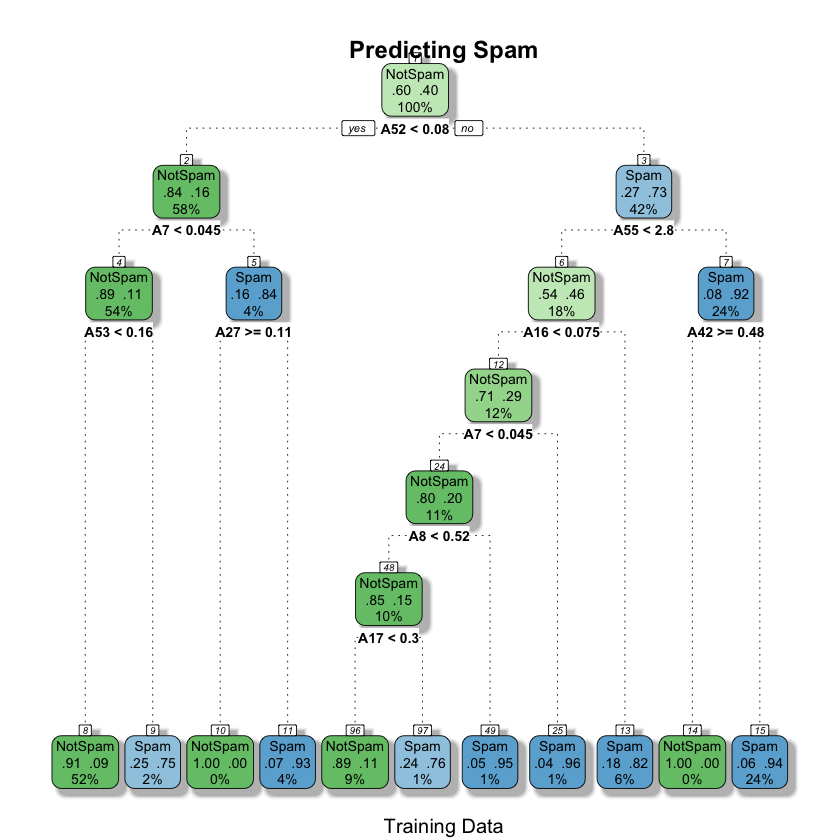

In [16]:
# Plot the final decision tree model
finaldt$finalModel %>%
  fancyRpartPlot(
    main = "Predicting Spam",
    sub  = "Training Data"
  )

In [17]:
# VALIDATE ON TEST DATA ####################################

# Predict on test set
pred <- finaldt %>%
  predict(newdata = tst)

# Accuracy of model on test data
cmtest <- pred %>%
  confusionMatrix(reference = tst$y)

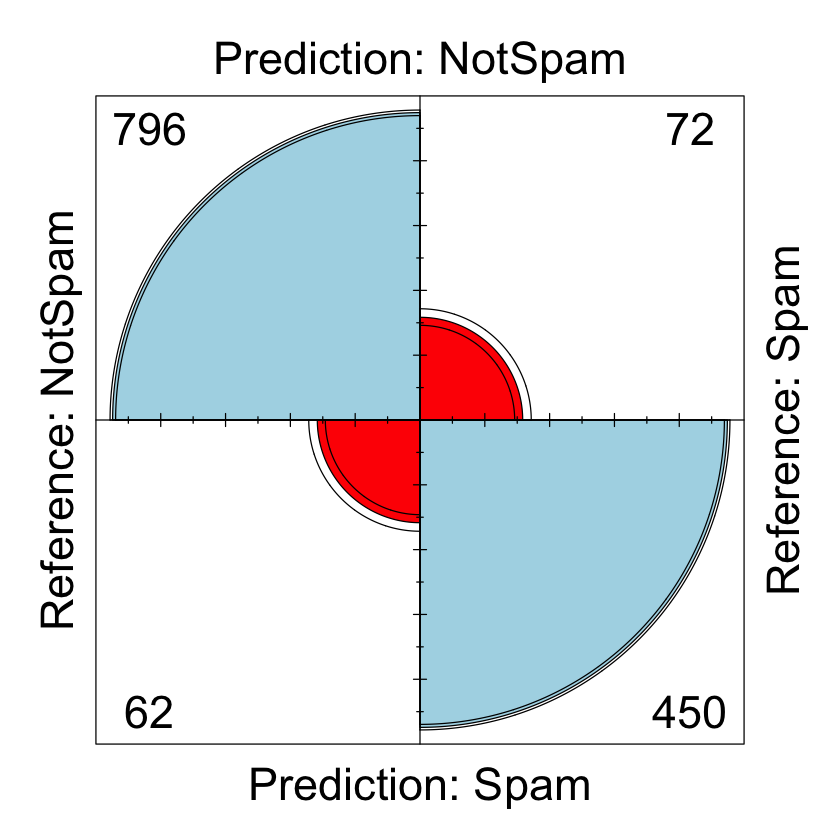

In [18]:
# Plot the confusion matrix
cmtest$table %>% 
  fourfoldplot(color = c("red", "lightblue"))

In [19]:
# Print the confusion matrix
cmtest %>% print()

Confusion Matrix and Statistics

          Reference
Prediction NotSpam Spam
   NotSpam     796   72
   Spam         62  450
                                        
               Accuracy : 0.9029        
                 95% CI : (0.886, 0.918)
    No Information Rate : 0.6217        
    P-Value [Acc > NIR] : <2e-16        
                                        
                  Kappa : 0.7928        
                                        
 Mcnemar's Test P-Value : 0.4369        
                                        
            Sensitivity : 0.9277        
            Specificity : 0.8621        
         Pos Pred Value : 0.9171        
         Neg Pred Value : 0.8789        
             Prevalence : 0.6217        
         Detection Rate : 0.5768        
   Detection Prevalence : 0.6290        
      Balanced Accuracy : 0.8949        
                                        
       'Positive' Class : NotSpam       
                                        
